# Line Fitting Using Gradient Descent Method

In [1]:
import numpy as np
import matplotlib.pyplot as pl

Load the data, and plot it.

In [2]:
data = np.loadtxt(open('line_fitting_data.csv', 'r'), 
                  delimiter=',', 
                  skiprows=1)

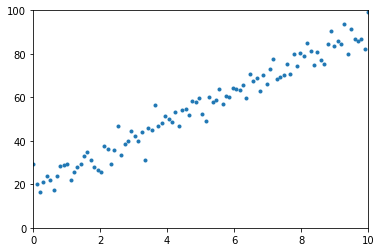

In [4]:
x_data = data[:, 0]
y_data = data[:, 1]
pl.plot(x_data, y_data, '.')
pl.xlim(0, 10)
pl.ylim(0, 100);

Define the model:

$$ f(x) = ax + b $$

- $x\in\mathbb{R}$
- $a, b \in\mathbb{R}$

So the model parameter is:

$$ c = \left[\begin{array}{l}
  a \\
  b \end{array}\right]\in\mathbb{R}^2 $$

In [5]:
def f(x, c):
    "x is the input, and c is the model parameter"
    a, b = c
    return a * x + b

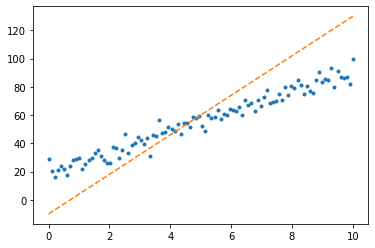

In [9]:
# Use an arbitrarily chosen model parameter of [14, -10]
y_pred = f(x_data, [14, -10])
pl.plot(x_data, y_data, '.')
pl.plot(x_data, y_pred, '--');

Assess the quality of the model parameter by the errors.

We want to define a loss function that maps the errors to a single scalar.

$L$ is the loss to be minimized.

$$ L = \sum_{i} (f(x_i, c) - y_i)^2 $$

We also need to compute the gradient
of $\nabla L(c)$.

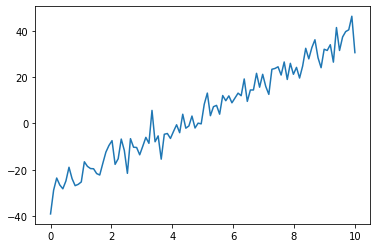

In [11]:
e = y_pred - y_data
pl.plot(x_data, e)

In [12]:
def loss(c):
    e = f(x_data, c) - y_data
    L = np.sum(e ** 2)
    return L

In [13]:
def loss_grad(c):
    e = f(x_data, c) - y_data
    grad_a = np.sum(2 * e * x_data)
    grad_b = np.sum(2 * e)
    return np.array([grad_a, grad_b])

In [14]:
loss_grad([14, -10])

array([16082.6208268 ,   909.94569583])

Perform gradient descent optimization

In [36]:
def gradientDescent(c0, alpha, n):
    logL = []
    c = np.array(c0)
    for i in range(n):
        c = c - alpha * loss_grad(c)
        L = loss(c)
        logL.append(L)
        if (i % (n/10)) == 0:
            print(i, L, c)
    return c, logL

In [37]:
c_optimal, logL = gradientDescent([10, 10], 1e-4, 2000)

0 4690.233867881605 [9.0718726  9.90900543]
200 2076.958326642718 [ 7.74629531 15.84556602]
400 1805.7104565974737 [ 7.41282253 18.06339235]
600 1768.6520295384692 [ 7.28956295 18.88315449]
800 1763.5890330406214 [ 7.24400323 19.18615836]
1000 1762.897316322684 [ 7.22716326 19.29815591]
1200 1762.8028125998228 [ 7.2209388 19.3395529]
1400 1762.7899013120043 [ 7.21863809 19.35485423]
1600 1762.7881373460139 [ 7.21778769 19.36050997]
1800 1762.7878963494484 [ 7.21747336 19.36260047]


We can visualize how well `c_optimal` models the data. 

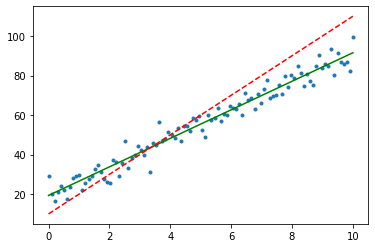

In [35]:
pl.plot(x_data, y_data, '.')
y_guess = f(x_data, [10, 10])
y_pred = f(x_data, c_optimal)
pl.plot(x_data, y_pred, color='green')
pl.plot(x_data, y_guess, '--', color='red');

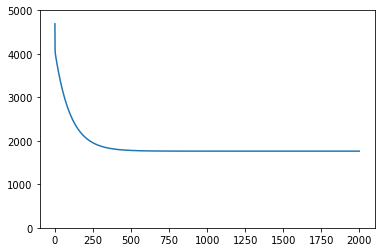

In [39]:
pl.plot(logL)
pl.ylim(0, 5000);